# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches.**

+ [Data](#data)
+ [Visualizing the Data](#Visualizing)
    + [Read in Parasitized cell image](#Parasitized)
    + [Read in Uninfected cell](#Uninfected)
+ [Dimensions Distribution and Finding out Average Dimensions.](#averagediemnsion)
    + [Let's find out the average dimensions of these images.](#findout)
    + [Visualize the image dimesions distribution](#visualizediemnsion)
    + [So why it is important to check the dimensions of the images?](#important)
+ [Preparing the Data for the model](#preparingdata)
    + [Image Manipulation](#imagemanipulation)
        + [Why we want to manipulate the image data?](#whymanipulate)
        + [So what is the good value for those random transformation parameters? How much should I rotate, stretch or sequeeze the images?](#howtochoose)
       + [Deciding whether we need to rescale the image?](#deciderescale)
    + [Image Data Generator](#imagedatagenerator)
    + [Image Data Augmentation](#augmentation)
    + [Generating many manipulated images from a directory](#manipulateddirectory)
+ [Creating the Model](#modelcreation)
+ [Training the Model](#training)
+ [Evaluating the Model](#evaluation)
+ [Predicting on an Imagel](#predictingsingleimage)

---------

# <a name='data'>Data</a>

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from matplotlib.image import imread

In [4]:
data_dir = 'C:\\Users\\Phone Thiri Yadana\\Desktop\\Dojo - Data Science and Machine Learning\\Complete Tensorflow 2 and Keras Deep Learning Bootcamp - JP\\04-CNNs\\cell_images\\'

In [5]:
os.listdir(data_dir)

['test', 'train']

In [8]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [9]:
# check which folders are inside this path
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+'/parasitized/')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


# <a name='Visualizing'>Visualizing the Data</a>

In [14]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [16]:
para_cell = train_path + '/parasitized/' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

## <a name='Parasitized'>Read in Parasitized cell image</a>

In [17]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [70]:
parasitized_cell = imread(para_cell)
parasitized_cell.shape

(148, 142, 3)

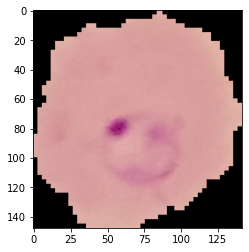

In [72]:
plt.imshow(parasitized_cell);

## <a name='Uninfected'>Read in Uninfected cell</a>

In [22]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [23]:
os.listdir(train_path + '/uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [37]:
uninfected_cell_path = train_path + '/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png' 
unifected_cell = imread(uninfected_cell_path)

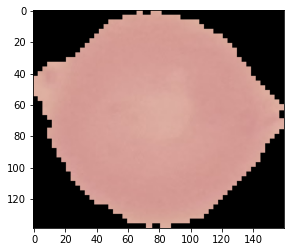

In [38]:
plt.imshow(imread(uninfected_cell_path));

-----

### Let's check how many images there are.

In [28]:
len(os.listdir(train_path+'parasitized'))

12480

In [29]:
len(os.listdir(train_path+'uninfected'))

12480

In [31]:
len(os.listdir(test_path+'parasitized'))

1300

In [32]:
len(os.listdir(test_path+'uninfected'))

1300

------

# <a name='averagediemnsion'>Dimensions Distribution and Finding out Average Dimensions.</a>

## <a name='findout'>Let's find out the average dimensions of these images.</a>

In real life datasets, the images can come in difference shape and dimensions.

In [39]:
unifected_cell.shape

(139, 160, 3)

In [40]:
# loop through every images of uninfected images to find out average dimensions
dim1 = []
dim2 = []

for img_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path + '/uninfected/' + img_filename)
    d1,d2,colors = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

In [41]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


## <a name='visualizediemnsion'> Visualize the image dimesions distribution</a>

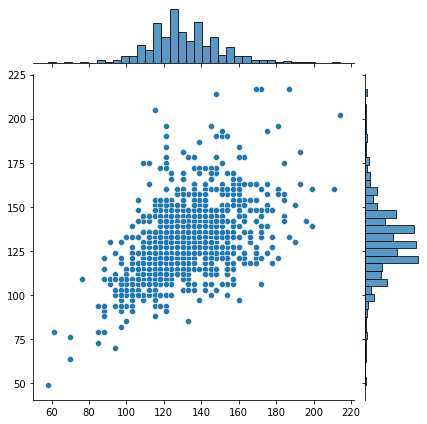

In [43]:
sns.jointplot(x=dim1, y=dim2);

We can see the smallest image is 60x50 and the largest one is by 220x221(around).

Most of the images are between 100x100 and 180x175.

## <a name='important'> So why it is important to check the dimensions of the images?</a>

+ Convolutional Neural Network isn't going to be able train on images of various sizes. So we need to make sure to resize all the images to be the same size.
+ So we have to choose what actual dimensions should I resize everything to.
+ What we should choose is the `average size` of dimensions.

In [44]:
np.mean(dim1)

130.92538461538462

In [45]:
np.mean(dim2)

130.75

So we dediced to use mean dimension size to resize all the images.

In [89]:
image_shape = (130, 130, 3)

--------

# <a name='preparingdata'> Preparing the Data for the model</a>

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

## <a name='imagemanipulation'> Image Manipulation</a>

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [49]:
130*130*3

50700

Now we will be dealing with 50,700 data points for every image.

### <a name='whymanipulate'>Why we want to manipulate the image data?</a>

+ Currently we have total training images of 24960 and we want to expand our training data.
+ One way we can do is rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have.

### <a name='howtochoose'>So what is the good value for those random transformation parameters? How much should I rotate, stretch or sequeeze the images?</a>

+ It all depends on the images that we are dealing with
+ In our cell image, lucky that cells are kinda round in nature and we expect that future image will follow the same shape. However we can expect the images can be in stretched or sequeezed , based on the data source.
+ for other use case like we are trying to detect the person image, we normally don't want to rotate the image 180 degree. Because it doesn't helpful for camera to detect upside down images unless someone is walking to that camera upside down.

In [57]:
os.listdir(train_path+'/parasitized/')

12480

In [59]:
len(os.listdir(train_path+'/uninfected'))

12480

In [60]:
12480 *2 

24960

### <a name='deciderescale'>Deciding whether we need to rescale the image?</a>
+ It seems like our image are already in scale (between 0 and 1). So we don't need to use `rescale` parameter.
+ In the case of we need to rescale the image, we need to use `rescale=1/255`


In [65]:
unifected_cell.min(), unifected_cell.max()

(0.0, 0.88235295)

In [73]:
parasitized_cell.min(), parasitized_cell.max()

(0.0, 0.9098039)

-----

## <a name='imagedatagenerator'>Image Data Generator</a>
+ `rotation_range`
+ `width_shift_range`
+ `height_shift_range`
+ `rescale`
+ `shear_range` : how much we cut off the image
+ `zoom_range`
+ `horizontal_flip`
+ `fill_mode`: `nearest` => tell where we want to get the image data to fill in the missing parts, after we cut off the image.

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [157]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# We can play around those values to do random transformation.

#### Before manipulation,

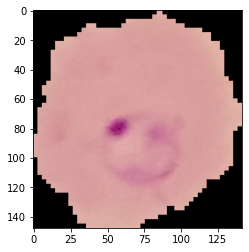

In [158]:
plt.imshow(parasitized_cell);

#### After manipulation using ImageDataGenerator's random transformation,

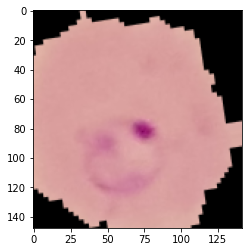

In [159]:
plt.imshow(image_gen.random_transform(parasitized_cell));

------

## <a name='augmentation'>Image Data Augmentation</a>

Now we are not limited by the size of the existing images. Using ImageDataGenerator, we can randomized the images and can expand our datasets.

In convoluational neural networks, it is important to have a large dataset to cover images with different sizes, shapes, etc.

### <a name='manipulateddirectory'>Generating many manipulated images from a directory</a>


In order to use `.flow_from_directory`, you must organize the images in **sub-directories**. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

#### Setting up directory to flow images from,

In [160]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [161]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


-------

# <a name='modelcreation'>Creating the Model</a>

https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras. callbacks import EarlyStopping

In [163]:
model = Sequential()

# Convoluntional Layers
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, #image_shape = (130, 130, 3)
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten out the layers
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))

# Dropout layer
# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Output lyaer
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',
                         metrics=['accuracy'])

#### Model Summary

In [164]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

### Early Stopping

In [166]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

### Batch Size
+ typical to use power of 2 as batch size.
+ depends on your hardward, choose a larger size.
+ the smaller the batch size, the longer it takes to train as you are passing multiple small sizes.

In [167]:
batch_size = 16 # 16 images at a time

------

# <a name='training'>Training the Model</a>

#### Training and Test Image Generator
+ for the training, we want to shuffle the images
+ however for the test image we don't want to shuffle the images.

In [168]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                                               target_size=image_shape[:2], #only care about width and height of image
                                                                               color_mode='rgb',
                                                                               batch_size=batch_size,
                                                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [169]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                                              target_size=image_shape[:2],
                                                                              color_mode='rgb',
                                                                              batch_size=batch_size,
                                                                              class_mode='binary',
                                                                              shuffle=False) # shuffle false

Found 2600 images belonging to 2 classes.


In [170]:
# we can check the classes
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [171]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

### Actual Training

In [ ]:
results = model.fit(train_image_gen, 
                            validation_data=test_image_gen,
                            callbacks=[early_stopping],
                            epochs=20,
                            verbose=1)

### Loading the pre-trained model (if we skip the actual training)

In [172]:
from tensorflow.keras.models import load_model

In [176]:
model = load_model('models/malaria_detector.h5')

--------

# <a name='evaluation'>Evaluating the Model</a>

As we have skipped actual training, we can run model.history. Otherwise, history visualization should be here.

## Model Metrics and Evaluate

In [177]:
model.metrics_names

['loss', 'accuracy']

In [179]:
model.evaluate(test_image_gen)

163/163 [==============================] - 35s 215ms/step - loss: 0.1403 - accuracy: 0.9531


[0.1402682214975357, 0.9530768990516663]

## Prediction

https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras

### Prediction Probabilities

In [180]:
pred_probabilities = model.predict(test_image_gen)

In [181]:
pred_probabilities

array([[1.4360905e-02],
       [1.1797619e-04],
       [2.5177896e-03],
       ...,
       [9.7454494e-01],
       [9.9452138e-01],
       [8.2132727e-01]], dtype=float32)

### Get Predictions based on prediction probabilities,

`IMPORTANT: In here we want to consider accuracy-precision-recall trade off and adjust the number.`

+ **Use Case: We can use ML model to make preliniary predictions and alert the doctor if accurcy is greater than 80% , 70%, etc.**

+ **Like which one is more important for our real life use case: Type I error, Type II error , etc**

In [182]:
predictions = pred_probabilities > 0.5 # can change this number based on our decision

In [183]:
len(predictions)

2600

In [184]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

### Classification Report and Confusion Matrix

In [185]:
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
test_image_gen.classes # can get the acutal classes 

array([0, 0, 0, ..., 1, 1, 1])

In [187]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [188]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1219,   81],
       [  48, 1252]], dtype=int64)

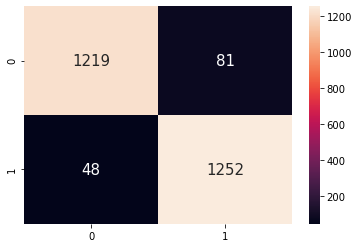

In [189]:
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions), annot=True, fmt='.0f', annot_kws={"size": 15});

#how to customize seaborn heatmap annot format
#https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

-------

# <a name='predictingsingleimage'>Predicting on an Image</a>

In [190]:
para_cell

'C:\\Users\\Phone Thiri Yadana\\Desktop\\Dojo - Data Science and Machine Learning\\Complete Tensorflow 2 and Keras Deep Learning Bootcamp - JP\\04-CNNs\\cell_images\\\\train\\/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

## Load and Resize the image

In [191]:
from tensorflow.keras.preprocessing import image

In [192]:
# resize it to desired shape
singel_image = image.load_img(para_cell, target_size=image_shape)

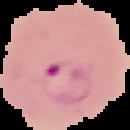

In [193]:
singel_image

## Converting to Array

In [194]:
singel_image_array = image.img_to_array(singel_image)

In [195]:
singel_image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [196]:
singel_image_array.shape

(130, 130, 3)

## Changing Shape Dimensions 
As our model expects the image to be in (1, 130, 130, 3) 
+ batch_size : even if a singel image, it needs to know how many
+ width
+ height
+ color channels

In [197]:
singel_image_array = np.expand_dims(singel_image_array, axis=0)

In [198]:
singel_image_array.shape

(1, 130, 130, 3)

## Make Predictions

In [199]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [200]:
model.predict(singel_image_array)

array([[0.]], dtype=float32)

As we see our model predicted cell as `parasitized: 0`